<a href="https://colab.research.google.com/github/amoladmane/Deep-Learning/blob/main/2_Binary_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification with Kearas
## Booking Cancellation

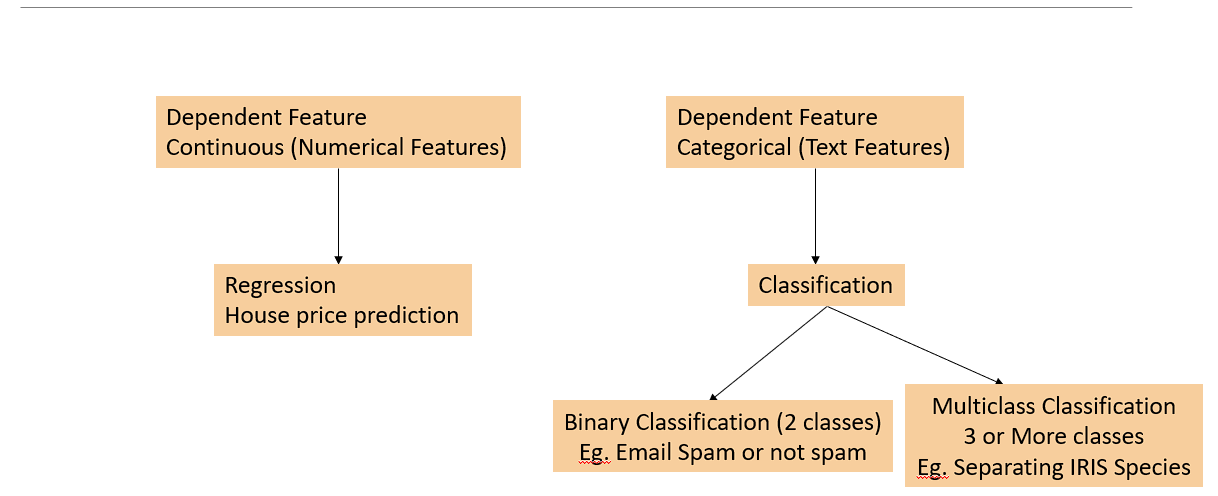

### Booking cancellation
### 0- booking not cancelled
### 1 - booking cancelled

### Step 1 = read data set

In [ ]:
import pandas as pd

In [ ]:
url1 = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv'
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### step 2 = basic data quality check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [ ]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Step 3 = separte X and Y ( booking_status )

In [ ]:
 df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]

In [ ]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [ ]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [ ]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

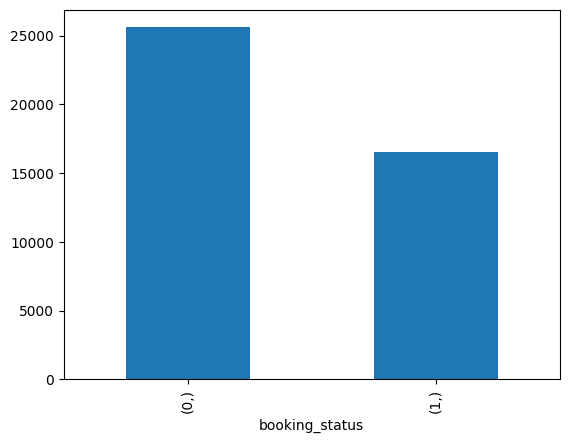

In [ ]:
Y.value_counts().plot(kind='bar')

### Step 4 - Apply preprocissing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Step 5: Perform Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y, test_size=0.20, random_state=22)

In [ ]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
146,0.15104,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.473487,0.428551,-0.173408,-0.060506,-0.101479,0.722524,0.552579
19782,0.15104,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-0.220654,0.409661,-0.916652,0.460940,-1.149928,-0.173408,-0.060506,-0.101479,0.428761,0.552579
36228,0.15104,-0.313454,0.130259,0.421768,-0.407020,-0.160945,-0.515173,0.716827,0.409661,-0.209778,1.248477,0.428551,-0.173408,-0.060506,-0.101479,-0.222581,0.552579
15978,0.15104,-0.313454,-0.998814,-0.278849,-0.407020,-0.160945,-0.515173,1.666642,0.409661,-0.563215,-0.101586,0.428551,-0.173408,-0.060506,-0.101479,0.205543,-0.737691
1105,0.15104,-0.313454,0.130259,-0.278849,1.294624,-0.160945,-0.515173,-0.269995,0.409661,-1.270088,-1.339143,0.428551,-0.173408,-0.060506,-0.101479,-1.043019,-0.737691


In [ ]:
ytrain.head()

,booking_status
146,1
19782,0
36228,1
15978,1
1105,1


In [ ]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
11867,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-1.145799,-2.441040,0.850531,-0.214091,-1.149928,-0.173408,-0.060506,-0.101479,-0.432604,-0.737691
36740,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,2.468434,0.409661,1.203968,-1.451649,0.428551,-0.173408,-0.060506,-0.101479,-0.419141,-0.737691
31090,2.056005,-0.313454,1.259332,-0.979466,-0.407020,-0.160945,0.685890,0.630480,0.409661,0.143658,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.053715,-0.737691
29577,-1.753925,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.578376,0.409661,-0.563215,-0.664112,-1.149928,-0.173408,-0.060506,-0.101479,-0.374175,0.552579
24111,0.151040,-0.313454,0.130259,0.421768,2.996268,-0.160945,-0.515173,-0.590712,0.409661,-1.623525,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,0.686174,-0.737691


In [ ]:
ytest.head()

,booking_status
11867,0
36740,1
31090,1
29577,0
24111,0


In [ ]:
xtrain.shape

(33680, 17)

In [ ]:
xtest.shape

(8420, 17)

### Step 6: Build the neural network
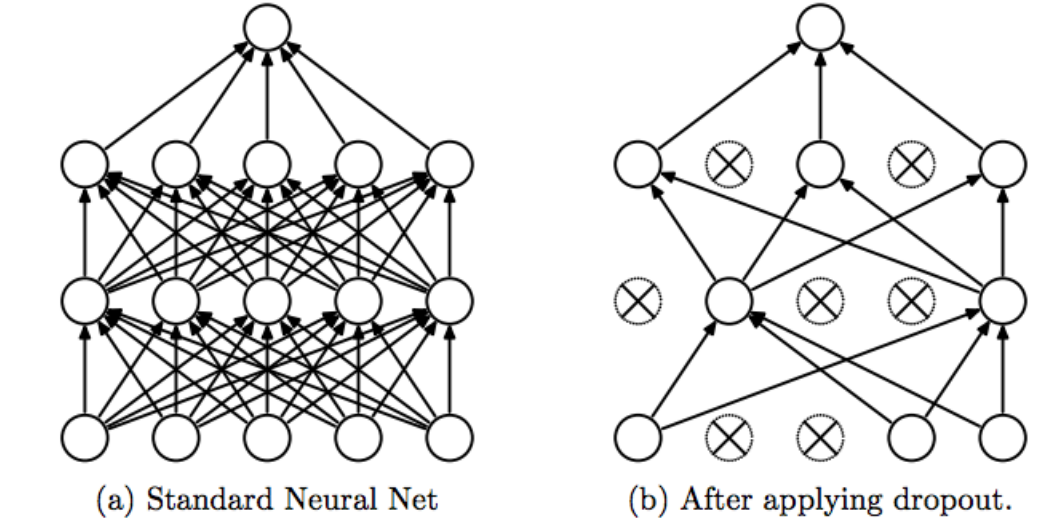


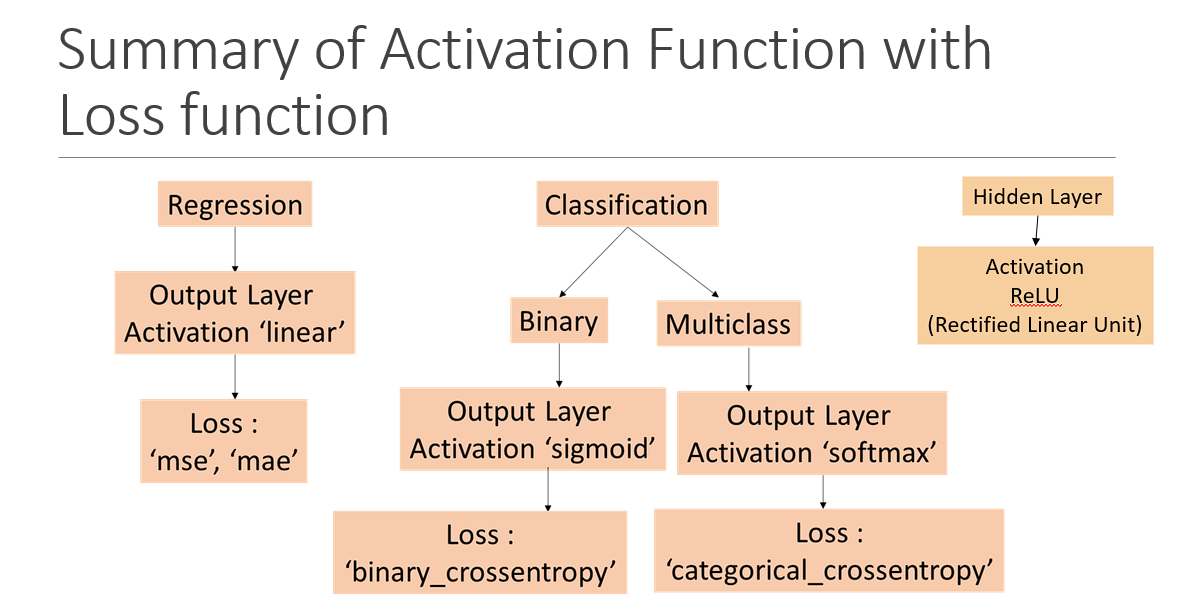

#### here we will ad one more layer i.e drop out later. which helps in the problem of overfitting model. It is always recommended to add it

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

In [ ]:
# Initialse Model
model = Sequential()

In [ ]:
# add input layer
model.add(Input(shape=(xtrain.shape[1],)))

In [ ]:
# add hidden layer 1
model.add(Dense(units=64, activation='relu'))
# add dropout layer
model.add(Dropout(rate=0.40))
# add hidden layer 2
model.add(Dense(units=32, activation='relu'))
# add dropout layer
model.add(Dropout(rate=0.3))
# add output layer
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics=['accuracy'])


In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)


Epoch 1/60
842/842 [==============================] - 3s 2ms/step - loss: 0.5281 - accuracy: 0.7339 - val_loss: 0.4744 - val_accuracy: 0.7752
Epoch 2/60
842/842 [==============================] - 2s 2ms/step - loss: 0.4870 - accuracy: 0.7700 - val_loss: 0.4687 - val_accuracy: 0.7815
Epoch 3/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4771 - accuracy: 0.7764 - val_loss: 0.4649 - val_accuracy: 0.7852
Epoch 4/60
842/842 [==============================] - 2s 2ms/step - loss: 0.4726 - accuracy: 0.7791 - val_loss: 0.4625 - val_accuracy: 0.7843
Epoch 5/60
842/842 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.7846 - val_loss: 0.4612 - val_accuracy: 0.7856
Epoch 6/60
842/842 [==============================] - 2s 2ms/step - loss: 0.4656 - accuracy: 0.7856 - val_loss: 0.4619 - val_accuracy: 0.7890
Epoch 7/60
842/842 [==============================] - 2s 2ms/step - loss: 0.4636 - accuracy: 0.7870 - val_loss: 0.4591 - val_accuracy: 0.7885
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12

### plot the learning curve

In [ ]:
import matplotlib.pyplot as plt

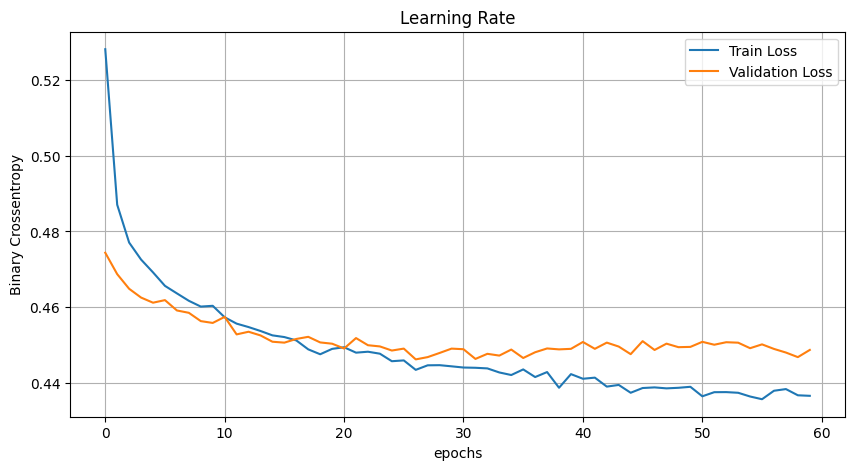

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.title('Learning Rate')
plt.legend()
plt.grid()

plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy')
plt.show()

### Predict result on train and test data

In [ ]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 2s 6ms/step


In [ ]:
yprob_train[0:5]

array([[0.5959875 ],
       [0.10046375],
       [0.503708  ],
       [0.942596  ],
       [0.56983596]], dtype=float32)

In [ ]:
yprob_test[0:5]

array([[0.07006376],
       [0.83342505],
       [0.9162603 ],
       [0.09112332],
       [0.67115813]], dtype=float32)

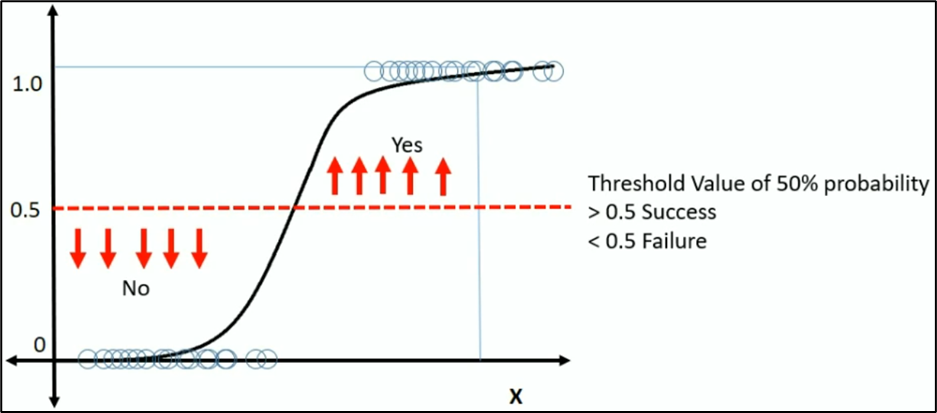

## So we have only probability . if prob >0.5 then 1 else 0. So we will use List Comprehension

In [ ]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]


In [ ]:
ypred_train[0:5]

[1, 0, 1, 1, 1]

In [ ]:
ytrain.head()

,booking_status
146,1
19782,0
36228,1
15978,1
1105,1


In [ ]:
ypred_test[0:5]

[0, 1, 1, 0, 1]

In [ ]:
ytest.head()

,booking_status
11867,0
36740,1
31090,1
29577,0
24111,0


## plot the confusion metrix

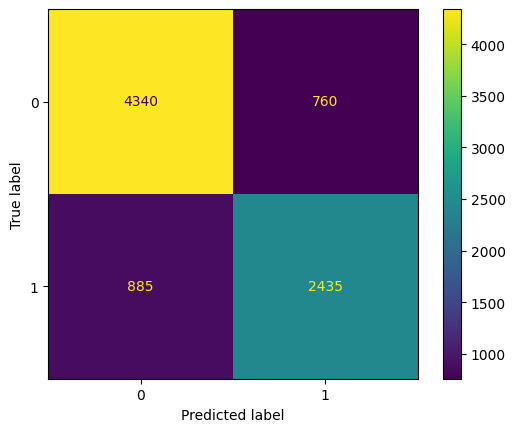

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Again we can verify our model flexibility and accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5100
           1       0.76      0.73      0.75      3320

    accuracy                           0.80      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Above model has good acucracy because it has 0.80 accuracy

## Save the above model

In [ ]:
model.save ('Booking_Model.keras')

#  Apply above model on out of sample data

## First of all load the model

In [ ]:
from keras.models import load_model
m = load_model('/content/Booking_Model.keras')

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12

In [ ]:
url2 = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv'
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


## apply num_pip for scaling that we already created

In [ ]:
xnew2= xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [ ]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [ ]:
prob = model.predict(xnew_pre)
prob[0:5]

878/878 [==============================] - 2s 3ms/step


array([[0.18726504],
       [0.04325008],
       [0.302214  ],
       [0.15843402],
       [0.6168494 ]], dtype=float32)

In [ ]:
preds = [ 1 if prob>=0.5 else 0 for prob in prob]
preds[0:5]

[0, 0, 0, 0, 1]

## Save above result in dx_final file

In [ ]:
dx_final = xnew[['id']]

In [ ]:
dx_final.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [ ]:
dx_final['booking_status']=preds
dx_final['probablity']=prob

<ipython-input-106-f81e222b3bfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx_final['booking_status']=preds
<ipython-input-106-f81e222b3bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx_final['probablity']=prob


In [ ]:
dx_final

,id,booking_status,probablity
0,42100,0,0.187265
1,42101,0,0.043250
2,42102,0,0.302214
3,42103,0,0.158434
4,42104,1,0.616849
...,...,...,...
28063,70163,1,0.954183
28064,70164,0,0.044727
28065,70165,0,0.155728
28066,70166,1,0.642945


dx_final['booking_status'].value_counts()

In [ ]:
dx_final['booking_status'].value_counts()

booking_status
0    17517
1    10551
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

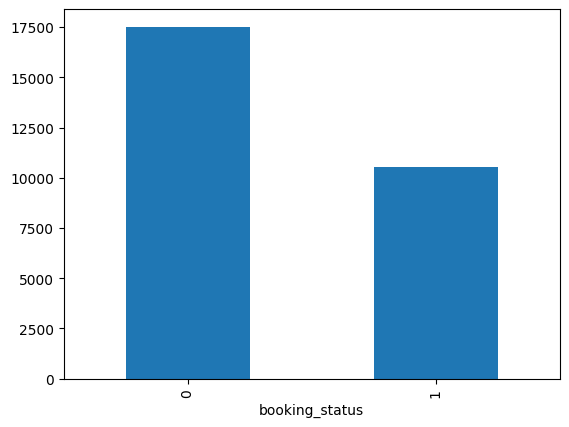

In [ ]:
dx_final['booking_status'].value_counts().plot(kind='bar')

## Save above result in CSV

In [ ]:
dx_final.to_csv('FinalBookingResult.csv', index = False)